# Medical Insurance Machine Learning Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt

In [2]:
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis (EDA)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

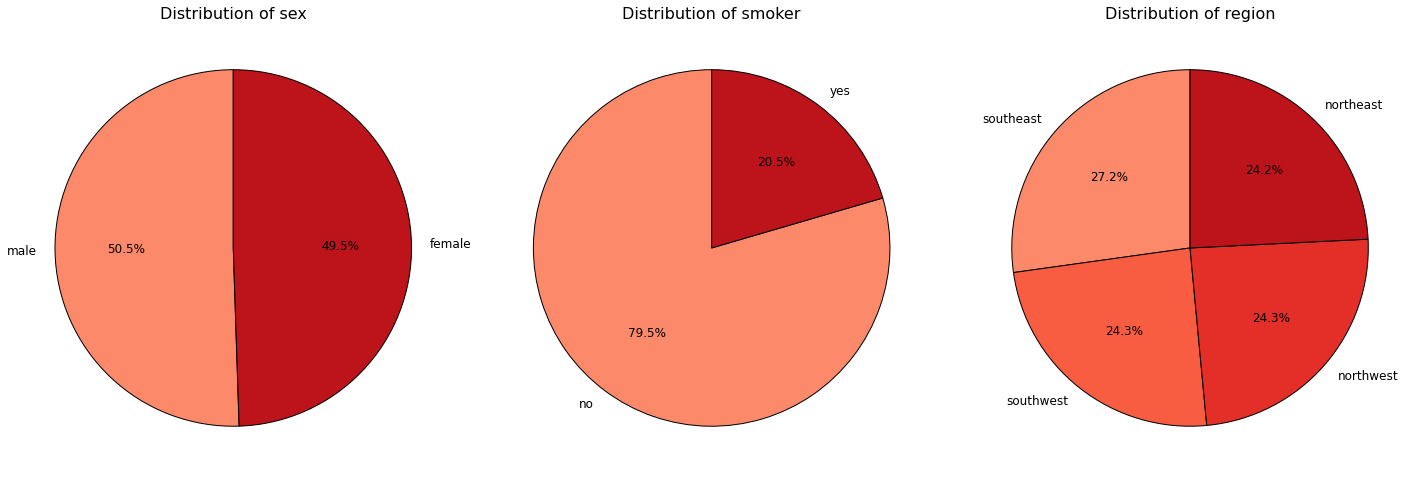

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Features to plot
features = ['sex', 'smoker', 'region']

# Figure
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
colormap = cm.get_cmap('Reds')

# Loop through features and create pie charts
for each, col in enumerate(features):
    x = data[col].value_counts()
    num_categories = len(x)
    colors = colormap(np.linspace(0.4, 0.8, num_categories))
    
    # Pie chart
    axes[each].pie(
        x.values,
        labels=x.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12}
    )
    
    # Labels
    axes[each].set_title(f'Distribution of {col}', fontsize=16)

plt.tight_layout()
plt.show()


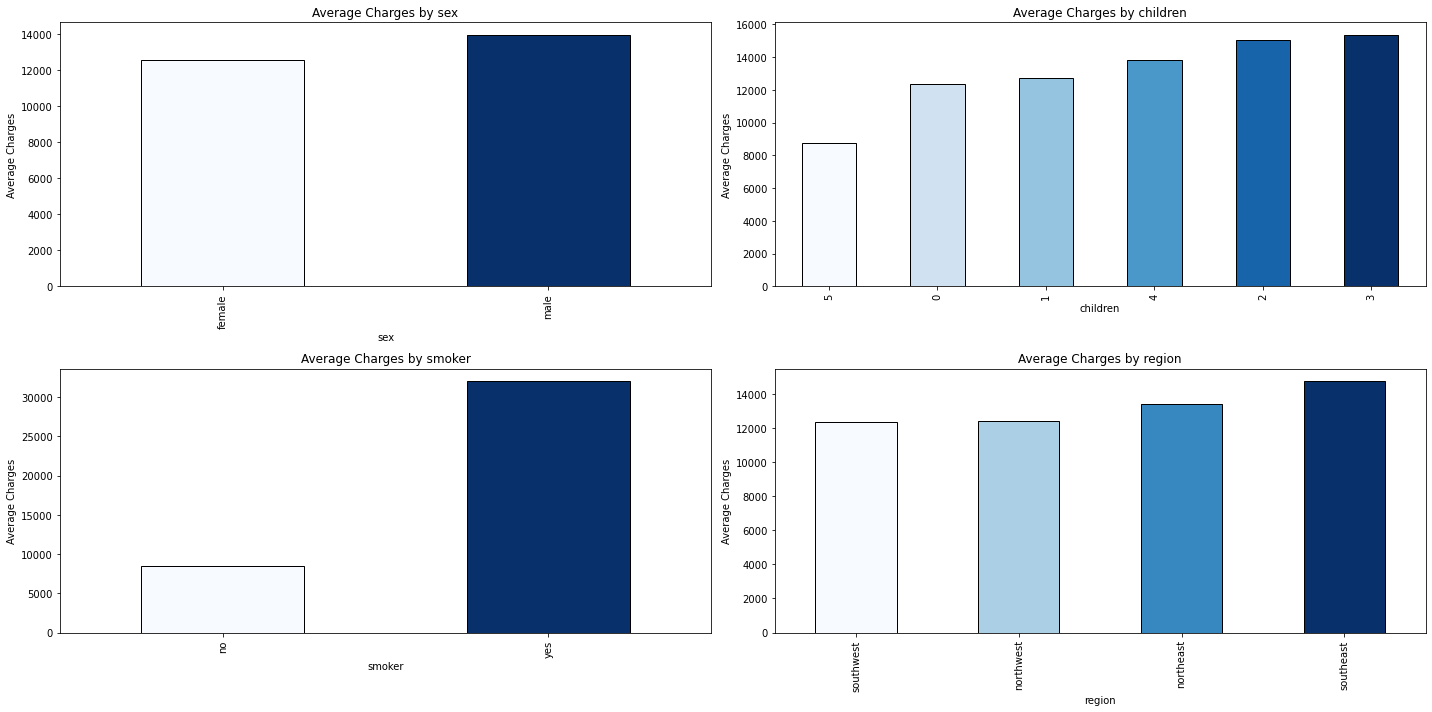

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# List of features
features = ['sex', 'children', 'smoker', 'region']

# Set the figure size
plt.subplots(figsize=(20, 10))

# Loop through features
for each, col in enumerate(features):
    plt.subplot(2, 2, each + 1)
    
    # Mean grouped by feature
    mean_charges = data.groupby(col)['charges'].mean().astype(float).sort_values(ascending=True)
    
    # colormap
    num_bars = len(mean_charges)
    colors = cm.get_cmap('Blues', num_bars)(np.arange(num_bars))
    mean_charges.plot.bar(color=colors, edgecolor='black')
    
    # labels
    plt.title(f"Average Charges by {col}")
    plt.xlabel(col)
    plt.ylabel('Average Charges')

plt.tight_layout()
plt.show()


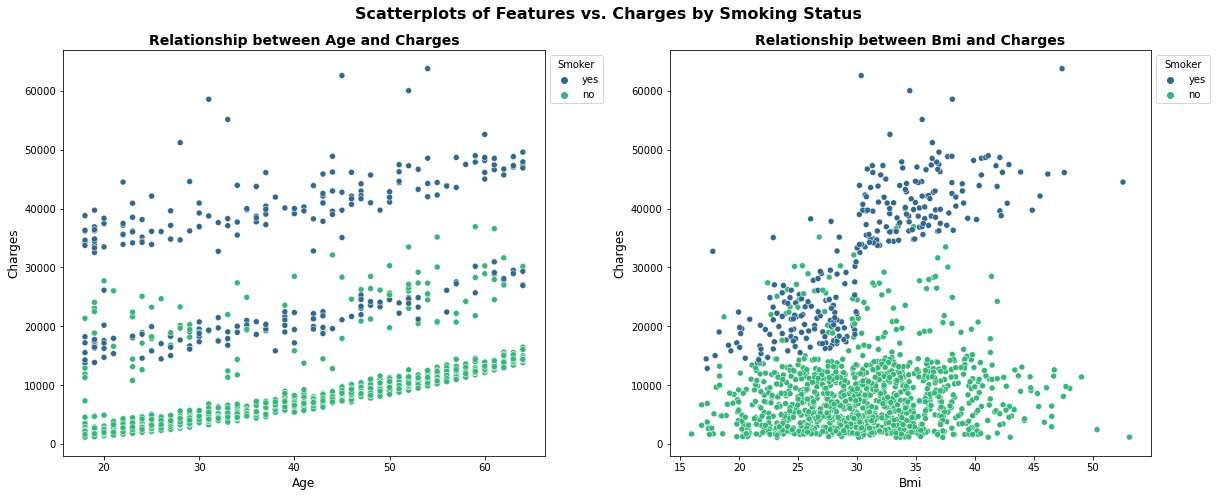

In [8]:
#libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Features used
features = ['age', 'bmi']

# figure size for scatterplots
plt.figure(figsize=(17, 7))

# Loop through features and create scatterplots
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    
    sns.scatterplot(
        data=data,
        x=col,
        y='charges',
        hue='smoker',
        palette='viridis',
    )
    
    # Add titles and axis labels
    plt.title(f"Relationship between {col.capitalize()} and Charges", fontsize=14, fontweight='bold')
    plt.xlabel(f"{col.capitalize()}", fontsize=12)
    plt.ylabel("Charges", fontsize=12)
    
    # Move legend outside the plot
    plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1, 1))

# Add a shared title for the entire figure
plt.suptitle("Scatterplots of Features vs. Charges by Smoking Status", fontsize=16, fontweight='bold')

# Improve spacing between subplots
plt.tight_layout()
plt.show()


### Beginning with the scatterplot on the left, there is a general uptrend for age, regardless of smoking, that shows the charges one must pay increases as they age. It's also very important to note that smoking, while uptrending with age, does incur higher charges when compared to non smoking clients. This smoking charge increase appears to be roughly double of that. The graph on the right shows a much sharper, intense uptrend when comparing smoking status with bmi. As bmi values increase, so do the insurance charges greatly for those who smoke. Non smokers, regardless of bmi, seem to have no general trend of charges, rather it appears that bmi does not affect the insurance charges that incur unless they are a smoker. From both of these graphs we can tell that smoking is a series indicator for an increase in insurance charges

## Data Preprocessing

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

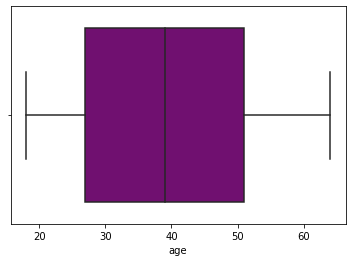

In [9]:
data.drop_duplicates(inplace=True)
sns.boxplot(data['age'], color='purple')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

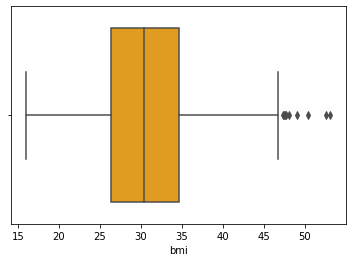

In [10]:
sns.boxplot(data['bmi'], color='orange')

In [11]:
Q1=data['bmi'].quantile(0.25)
Q2=data['bmi'].quantile(0.5)
Q3=data['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(f"Lower limit: {lowlim}")
print(f"Upper limit: {upplim}")

Lower limit: 13.674999999999994
Upper limit: 47.31500000000001


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

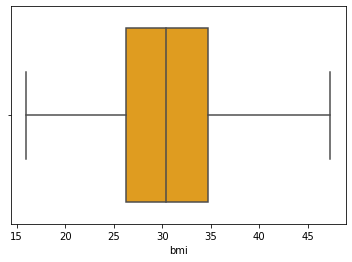

In [12]:
#!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
data[['bmi']]=arb.fit_transform(data[['bmi']])
sns.boxplot(data['bmi'], color='orange')

## One Hot Encoding (Get Dummies)

In [13]:
import pandas as pd

# One-Hot Encoding using get_dummies and updating the existing 'data' DataFrame
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.111998,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.111998,1.000000,0.013692,0.199063,0.044831,0.003151,-0.135822,0.268600,-0.005100
children,0.041536,0.013692,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.199063,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.044831,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003151,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.135822,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.268600,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.005100,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


### Here we see in the correlation heatmap a strong psootive correlation of 0.79 between the charges someone must pay for insurance and if they are a smoker. There are smaller correlations as well between charges and factors such as BMI (Body Mass Index) and Age

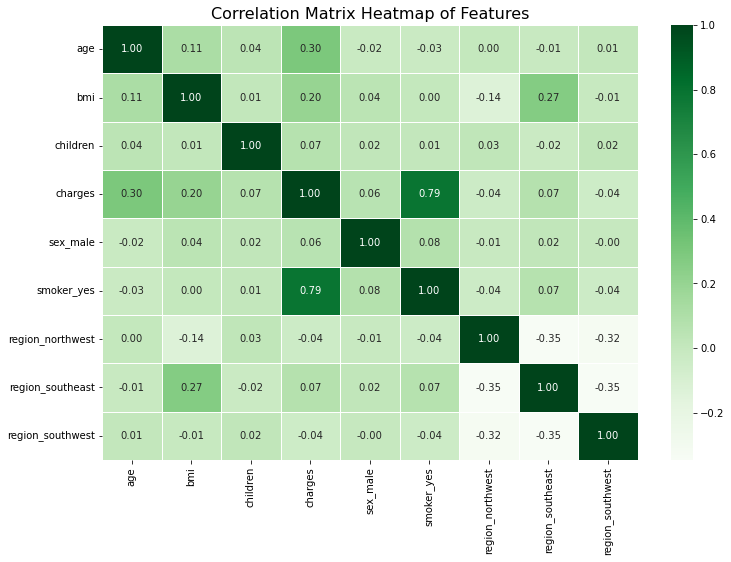

In [14]:
corr_matrix = data.corr()

# Heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)

# Title, labels, and projection
plt.title("Correlation Matrix Heatmap of Features", fontsize=16)
plt.show()


In [15]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd

# Feature and Target variables
X = data.drop(columns=['charges'])
y = data['charges']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {"MSE": mse, "R2": r2}

# DF for results
results_df = pd.DataFrame(results).T

# best model based on MSE
best_model_name = results_df['MSE'].idxmin()
best_model_results = results_df.loc[best_model_name]

# Display results
print("All Model Results:")
print(results_df)
print("\nBest Model:")
print(f"Model: {best_model_name}")
print(f"MSE: {best_model_results['MSE']}")
print(f"R2: {best_model_results['R2']}")


All Model Results:
                            MSE        R2
Linear Regression  3.545290e+07  0.807065
Ridge Regression   3.563160e+07  0.806093
Lasso Regression   3.546592e+07  0.806995
Random Forest      2.204934e+07  0.880008
Gradient Boosting  1.804282e+07  0.901811
SVR                2.084624e+08 -0.134452
XGBoost            2.522656e+07  0.862717

Best Model:
Model: Gradient Boosting
MSE: 18042816.653047062
R2: 0.901811040918837


### It's observed that Gradient Boosting was the best performing model of the options used. It displayed the lowest Mean Square Error (MSE) value and the higher R^2 (accuracy) value

## Hyperparameter Tuned Gradient Boosting Model

In [17]:
#libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#hyperparameter tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8]
}
gbr = GradientBoostingRegressor(random_state=42) #standard 42

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="neg_mean_squared_error", 
    cv=5,  # 5-fold cross validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator and predictions for model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# MSE and R2
best_mse = mean_squared_error(y_test, y_pred)
best_r2 = grid_search.best_score_

# Results
print("Best Model Parameters:", grid_search.best_params_)
print("Best R2 Score:", best_r2)
print("Test Set MSE for Best Model:", best_mse)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Model Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 Score: -21639063.216918625
Test Set MSE for Best Model: 19056658.00942937


### The best performing Gradient Boosting model proved to be the original version with no hyperparameter tuning. These adjustments to the orignal lead to a much lower Mean Squared Error of 191 and a much lower R sqaured values of -216. The original, unedited model serves as the best version with the lowest MSE of and higher accuracy (R2) value of .90. In the future, the model can be improved to further reduce the MSE value from its current state of rouhgly 18,352,566. 